Baseline for siyuanzhao implementation
====

Sample 70-30%. Exercises represented by skill id.
Program failed after epoch 40

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import pickle
import seaborn

from sklearn import metrics

In [2]:
seaborn.set_style('white')
seaborn.set_palette('colorblind')

In [3]:
training_preformances = pandas.DataFrame([[0.456, 0.676, 0.090],
[0.442, 0.726, 0.148],
[0.433, 0.746, 0.180],
[0.429, 0.757, 0.198],
[0.427, 0.763, 0.206],
[0.425, 0.768, 0.213],
[0.423, 0.772, 0.220],
[0.421, 0.775, 0.226],
[0.420, 0.778, 0.231],
[0.419, 0.781, 0.235],
[0.418, 0.783, 0.239],
[0.416, 0.787, 0.244],
[0.415, 0.789, 0.247],
[0.414, 0.791, 0.251],
[0.413, 0.793, 0.254],
[0.412, 0.796, 0.259],
[0.411, 0.798, 0.263],
[0.410, 0.800, 0.265],
[0.409, 0.802, 0.269],
[0.409, 0.803, 0.270],
[0.408, 0.805, 0.274],
[0.407, 0.805, 0.275],
[0.406, 0.808, 0.280],
[0.405, 0.810, 0.282],
[0.405, 0.810, 0.282],
[0.406, 0.809, 0.281],
[0.406, 0.808, 0.279],
[0.407, 0.807, 0.277],
[0.406, 0.808, 0.279],
[0.405, 0.811, 0.283],
[0.405, 0.811, 0.284],
[0.406, 0.809, 0.281],
[0.407, 0.808, 0.278],
[0.405, 0.811, 0.282],
[0.406, 0.809, 0.280],
[0.405, 0.812, 0.285],
[0.403, 0.815, 0.290],
[0.402, 0.817, 0.294],
[0.402, 0.817, 0.294],
[0.405, 0.811, 0.283],
[0.411, 0.799, 0.261]], columns=['rmse', 'auc', 'r2'])
training_preformances['iteration'] = range(1, training_preformances.shape[0] + 1)
training_preformances['type'] = 'training'

In [4]:
testing_performances = pandas.DataFrame([[5, 0.431, 0.748, 0.178],
[10, 0.430, 0.751, 0.183],
[15, 0.432, 0.748, 0.176],
[20, 0.434, 0.744, 0.165],
[25, 0.436, 0.739, 0.159],
[30, 0.436, 0.740, 0.159],
[35, 0.437, 0.737, 0.157],
[40, 0.439, 0.733, 0.148]], columns=['iteration', 'rmse', 'auc', 'r2'])
testing_performances['type'] = 'testing'

In [9]:
sz_general_result = pandas.concat([training_preformances, testing_performances])

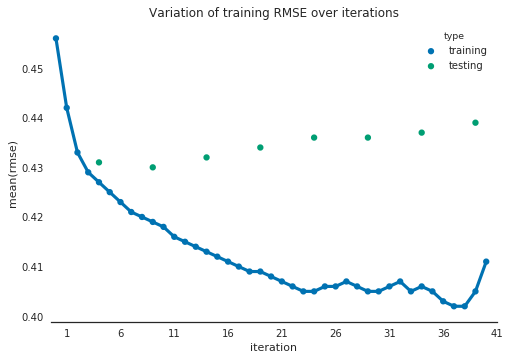

In [10]:
seaborn.pointplot(x="iteration", y="rmse", data=sz_general_result, hue='type', markers='.', linestyles='-')
plt.title('Variation of training RMSE over iterations')
seaborn.despine(left=True)
plt.xticks(range(1, general_result.iteration.max()+1, 5), range(1, general_result.iteration.max()+1, 5))
plt.show()

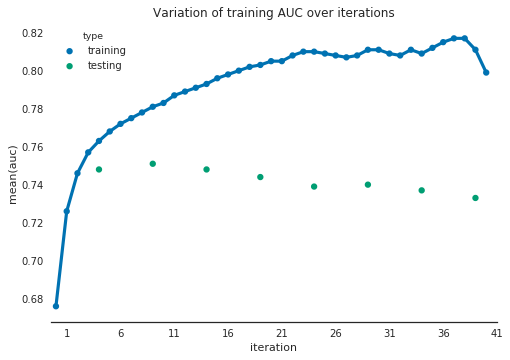

In [11]:
seaborn.pointplot(x="iteration", y="auc", data=sz_general_result, hue='type', markers='.', linestyles='-')
plt.title('Variation of training AUC over iterations')
seaborn.despine(left=True)
plt.xticks(range(1, general_result.iteration.max()+1, 5), range(1, general_result.iteration.max()+1, 5))
plt.show()

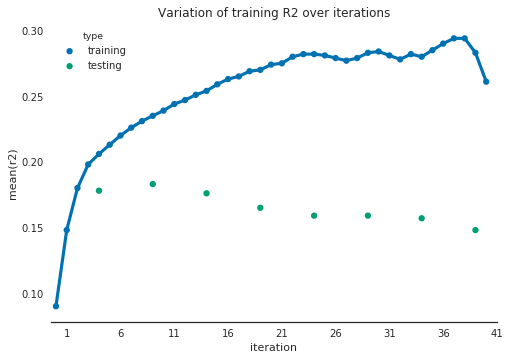

In [12]:
seaborn.pointplot(x="iteration", y="r2", data=sz_general_result, hue='type', markers='.', linestyles='-')
plt.title('Variation of training R2 over iterations')
seaborn.despine(left=True)
plt.xticks(range(1, general_result.iteration.max()+1, 5), range(1, general_result.iteration.max()+1, 5))
plt.show()

Baseline for LSTM Tensorflow implementation
====

The experiment configuration is the following
 - Training, test, validation partition of 0.7, 0.2, 0.1
 - hidden_layer_size: 200, batch_size: 50,
 - training_epochs: 1000, max_num_steps: 100
 - Exercises represented by skill id


Validation results
---

In [15]:
lstm_results = pandas.DataFrame([
        [100, 0.37774336338**2],
        [200, 0.374526202679**2],
        [300, 0.371596008539**2],
        [400, 0.370969474316**2],
        [500, 0.37161102891**2],
        [600, 0.370761245489**2],
        [700, 0.371204853058**2],
        [800, 0.371966093779**2],
        [900, 0.373404085636**2],
    ], columns=['iteration', 'r2'])
lstm_results['type'] = 'validation'

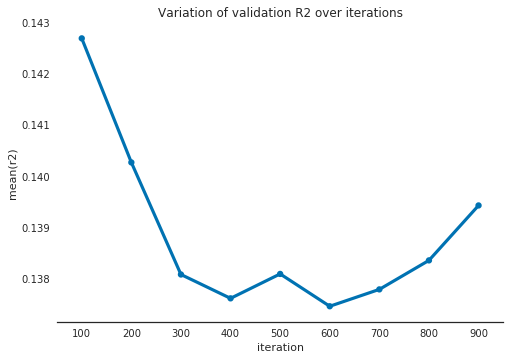

In [17]:
seaborn.pointplot(x="iteration", y="r2", data=lstm_results, markers='.', linestyles='-')
plt.title('Variation of validation R2 over iterations')
seaborn.despine(left=True)
plt.show()

Testing results
---

In [ ]:
test_prediction_file = '../../results/dkt_lstm/by_skill_id/predictions.p'

with open(test_prediction_file, 'r') as prediction_file:
    predictions = pickle.load(prediction_file)

ROC curve metrics

In [25]:
def get_auc_roc_curve(true, predicted):
    results = []
    for true_sequence, predicted_sequence in zip(true, predicted):
        try:
            results.append(metrics.roc_auc_score(true_sequence, predicted_sequence))
        except ValueError:
            print 'Sequence with only one class, ignoring.'
    return results

In [26]:
get_auc_roc_curve(*predictions)

Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.
Sequence with only one class, ignoring.


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

Root Mean Squared Error

In [52]:
def get_rmse(true, predicted):
    results = []
    for true_sequence, predicted_sequence in zip(true, predicted):
        results.append([metrics.mean_squared_error(true_sequence, predicted_sequence)**0.5,
                        true_sequence.shape[0]])
    return pandas.DataFrame(results, columns=['RMSE', 'Sequence lenght'])

In [53]:
rmse_results = get_rmse(*predictions)

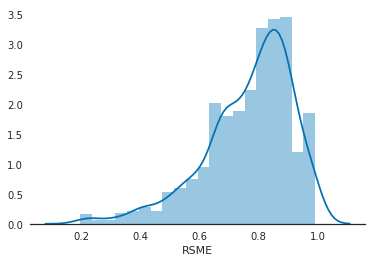

In [45]:
seaborn.distplot(rmse_results.RMSE)
seaborn.despine(left=True)

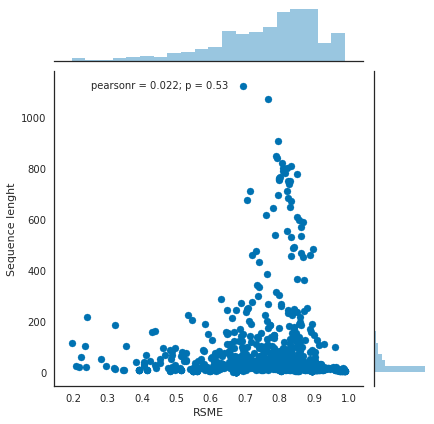

In [51]:
seaborn.jointplot(x='RSME', y='Sequence lenght', data=rmse_results)